In [1491]:
#cmp3749m_myronfurtado_19703402_1 

In [1492]:
#install Packages if needed(uncomment them run them, if needed)
#!pip install findspark
#!pip install pyspark

#!pip install jupyter
#!pip install pip
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install matplotlib-inline
#!pip install seaborn

In [1493]:
#importing the libraries i will need later
from pyspark.sql.types import StructType,StructField,StringType,IntegerType
from pyspark.sql.functions import col
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# schema for use with our own created dataframes later.. we could have loaded it from a CSV? Yes, just do inferSchema=True
#schema = StructType([StructField("text",StringType(),True),StructField("label", IntegerType(), True)])

In [1494]:
#INITALISE SPARK
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.sql("select 'Spark' as Hello")
#df = spark.sql("select 'spark', 'myron' as hello")
df.show()

+-----+
|Hello|
+-----+
|Spark|
+-----+



In [1495]:
#loading the dataset into a Pyspark dataframe using Python

df = spark.read.csv("nuclear_plants_small_dataset.csv", inferSchema=True, header=True)

#n=number of rows to display, truncate= no of characters
df.show(n=10, truncate=50)

+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Status|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Pressure _sensor_4|Vibration_sensor_1|Vibration_sensor_2|Vibration_sensor_3|Vibration_sensor_4|
+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Normal|              4.5044|              0.7443|                 6.34|              1.9052|           29.5315|            0.8647|            2.2044|             6.048|           14.4659|            21.648|           15.3429|            1.2186|
|Normal|        

In [1496]:
#checking Schema and datatypes
df.printSchema()

root
 |-- Status: string (nullable = true)
 |-- Power_range_sensor_1: double (nullable = true)
 |-- Power_range_sensor_2: double (nullable = true)
 |-- Power_range_sensor_3 : double (nullable = true)
 |-- Power_range_sensor_4: double (nullable = true)
 |-- Pressure _sensor_1: double (nullable = true)
 |-- Pressure _sensor_2: double (nullable = true)
 |-- Pressure _sensor_3: double (nullable = true)
 |-- Pressure _sensor_4: double (nullable = true)
 |-- Vibration_sensor_1: double (nullable = true)
 |-- Vibration_sensor_2: double (nullable = true)
 |-- Vibration_sensor_3: double (nullable = true)
 |-- Vibration_sensor_4: double (nullable = true)



In [1497]:
#check the number of rows in df
print("row count:  ", df.count())
print("\n")

#get dataframe size and shape, as Spark df has no .shape() attribute
print(df.count(), len(df.columns))

row count:   996


996 13


In [1498]:
#read the file using pandas(for reference)
import pandas as pd

#data = pd.read_csv("nuclear_plants_small_dataset.csv", sep=",")
#data

#count the number of rows
#data.count()

#to check the shape of pandas dataframe
#data.shape

In [1499]:
#Task 1 - Checking for missing values and dealing with them, also explain in report

#find the count of Null and NaN row values


#find rows with any missing values(Null,NaN, None, " ")


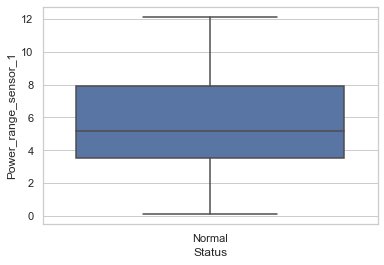

In [1500]:
#task 2
#convert spark df to pandas df
pandas_df = df.toPandas()
#print(pandas_df)

#Selects the only the rows where the status is "Normal" and saves them to a variable dfNormal
dfNormal = pandas_df.loc[pandas_df['Status'] == "Normal"]
#print(dfNormal)
#Selects the only the rows where the status is "Abnormal" and saves them to a variable dfAbnormal
dfAbnormal = pandas_df.loc[pandas_df['Status'] == "Abnormal"]
#print(dfAbnormal)

#dropping Status Column
normalDropDF = dfNormal.drop(['Status'], axis=1)
abnormalDropDF = dfAbnormal.drop(['Status'], axis=1)
#print(abnormalDropDF)

#box plots

ax= sns.boxplot(y= dfNormal["Power_range_sensor_1"], x=dfNormal["Status"])
plt.show()

In [1501]:
normalCol1 = dfNormal.filter(['Power_range_sensor_1'])
normalCol = normalCol1.rename(columns={'Power_range_sensor_1': 'Normal'})
#print(normalCol)
abnormalCol1= dfAbnormal.filter(['Power_range_sensor_1'])
abnormalCol = abnormalCol1.rename(columns={'Power_range_sensor_1': 'Abnormal'})
#print(abnormalCol)

#plotDF = pd.DataFrame()
plotDF = pd.concat([normalCol, abnormalCol], axis=1)
#print(plotDF)

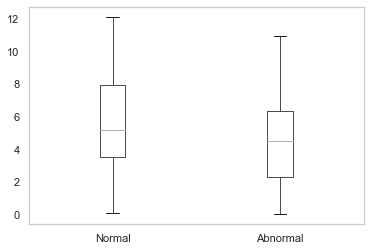

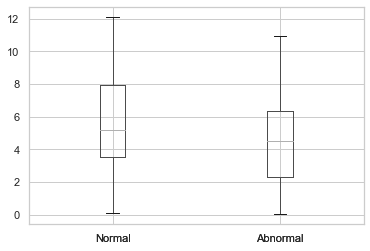

In [1502]:
#box plots
sns.set_theme(style="whitegrid")
plotDF.boxplot(column=['Normal', 'Abnormal'], grid=False)

plt.show()

#box plots
sns.set_theme(style="whitegrid")
plotDF1.boxplot(column=['Normal', 'Abnormal'])
plotDF2.boxplot(column=['Normal', 'Abnormal'])

plt.show()

In [1503]:
correlationMatrix = pandas_df.corr(method='pearson')
#pd.set_option('display.max_rows', None, 'display.max_columns', None) #this prints the full pandas matrix but it looks unprofessional
print(correlationMatrix)

                       Power_range_sensor_1  Power_range_sensor_2  \
Power_range_sensor_1               1.000000              0.095235   
Power_range_sensor_2               0.095235              1.000000   
Power_range_sensor_3               0.229943              0.693818   
Power_range_sensor_4               0.499795              0.228438   
Pressure _sensor_1                 0.047805             -0.222160   
Pressure _sensor_2                 0.652081              0.112438   
Pressure _sensor_3                 0.199811              0.583086   
Pressure _sensor_4                 0.406382              0.136380   
Vibration_sensor_1                -0.152247             -0.119142   
Vibration_sensor_2                -0.003684              0.011013   
Vibration_sensor_3                 0.106583              0.243242   
Vibration_sensor_4                 0.014177              0.058244   

                       Power_range_sensor_3   Power_range_sensor_4  \
Power_range_sensor_1            